In [14]:
#https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/phase-estimation-and-factoring
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFTGate
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
from qiskit_aer import AerSimulator
import math
from math import pi, cos, sin
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

theta = 0.7
m = 10  # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 * pi * theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFTGate(m).inverse(),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
#display(qc.draw('mpl'))

In [15]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import transpile

backend = AerSimulator()

qc_transpiled = transpile(qc, backend)
sampler = Sampler(mode=backend)
job = sampler.run([qc_transpiled])

result = job.result()

counts = result[0].data.Result.get_counts()

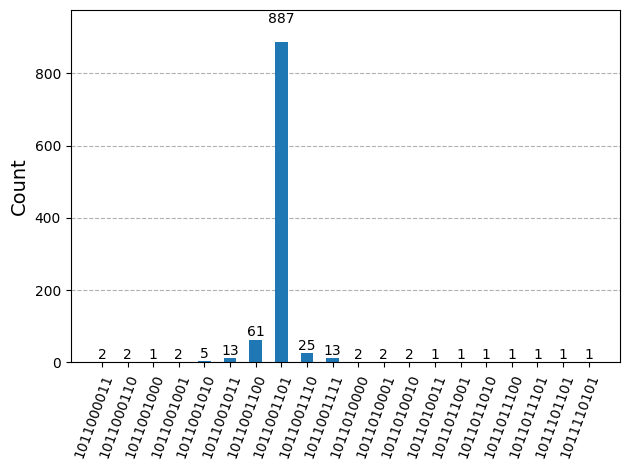

In [16]:
display(plot_histogram(counts))

In [17]:
most_probable = int(max(counts, key=counts.get), 2)

print(f"Most probable output: {most_probable}")
print(f"Estimated theta: {most_probable/2**m}")

Most probable output: 717
Estimated theta: 0.7001953125


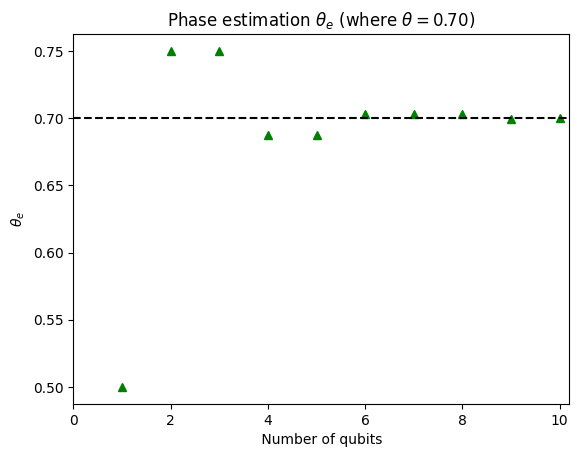

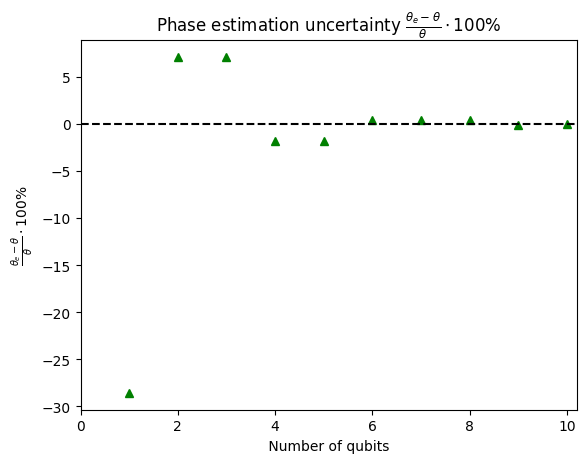

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
DaneY1=[0.5,0.75,0.75,0.6875,0.6875,0.703125,0.703125,0.703125,0.69921875,0.7001953125]
DaneX=[1,2,3,4,5,6,7,8,9,10]
DaneY2=[]
for i in range(len(DaneY1)):
    DaneYX=((DaneY1[i]-theta)/theta) *100
    DaneY2.append(DaneYX)
plt.title(u'Phase estimation $\\theta_e$ (where $\\theta=0.70$)')
plt.xlabel(r' Number of qubits ')
plt.ylabel(r'$\theta_e$')
plt.xlim([0, m+0.2])
plt.plot(DaneX,DaneY1, 'g^')
plt.hlines(y=0.70,xmin=0.0,xmax=m+0.2, colors='k', linestyles='dashed')
#path and filename of the file to plot:
outputfile = 'Phase_estimation_1_'+str(m)+'.png'
#saves the plot as pdf file in "outputfile":
plt.savefig(outputfile, dpi=300, format='png')  
plt.show()
plt.clf()


plt.title(r'Phase estimation uncertainty $\frac{\theta_e - \theta}{\theta} \cdot 100\%$')
plt.xlabel(r' Number of qubits ')
plt.ylabel(r'$\frac{\theta_e - \theta}{\theta} \cdot 100\%$')
plt.xlim([0, m+0.2])
plt.plot(DaneX,DaneY2, 'g^')
plt.hlines(y=0.0,xmin=0.0,xmax=m+0.2, colors='k', linestyles='dashed')
#path and filename of the file to plot:
outputfile = 'Phase_estimation_2_'+str(m)+'.png'
#saves the plot as pdf file in "outputfile":
plt.savefig(outputfile, dpi=300, format='png')  
plt.show()
plt.clf()

## 151936 Tasks to Laboratory 6

In [30]:
THETA = 0.33
MIN_CONTROL_QUBITS = 1
MAX_CONTROL_QUBITS = 10
BACKEND = AerSimulator()
SAMPLER = Sampler(mode=BACKEND)

In [31]:
def run_phase_estimation(theta, control_qubits):
    results_decimal = []
    results_theta_e = []
    results_error = []
    n_range = list(range(1, MAX_CONTROL_QUBITS + 1))

    for control_qubits in n_range:
            control_register = QuantumRegister(control_qubits, name="Control")
            target_register = QuantumRegister(1, name="|ψ>")
            output_register = ClassicalRegister(control_qubits, name="Result")
            qc = QuantumCircuit(control_register, target_register, output_register)

            qc.x(target_register)
            qc.barrier()

            for index, qubit in enumerate(control_register):
                qc.h(qubit)
                for _ in range(2**index):
                    qc.cp(2 * pi * theta, qubit, target_register)

            qc.barrier()

            qc.compose(QFTGate(control_qubits).inverse(), inplace=True)

            qc.measure(range(control_qubits), range(control_qubits))
            qc_transpiled = transpile(qc, BACKEND)
            job = SAMPLER.run([qc_transpiled])

            result = job.result()
            counts = result[0].data.Result.get_counts()
            
            most_probable_bitstring = max(counts, key=counts.get)
            most_probable_int = int(most_probable_bitstring, 2)
            
            theta_e = most_probable_int / (2**control_qubits)
            error_pct = 100 * (theta_e - THETA) / THETA
            
            results_decimal.append(most_probable_int)
            results_theta_e.append(theta_e)
            results_error.append(error_pct)
            
    return n_range, results_decimal, results_theta_e, results_error


--- Results for 9:45 (Theta = 0.33) ---
n (Qubits) | Decimal         | Estimated θe    | Error (%) 
----------------------------------------
1          | 1               | 0.500000        | 51.52     %
2          | 1               | 0.250000        | -24.24    %
3          | 3               | 0.375000        | 13.64     %
4          | 5               | 0.312500        | -5.30     %
5          | 11              | 0.343750        | 4.17      %
6          | 21              | 0.328125        | -0.57     %
7          | 42              | 0.328125        | -0.57     %
8          | 84              | 0.328125        | -0.57     %
9          | 169             | 0.330078        | 0.02      %
10         | 338             | 0.330078        | 0.02      %


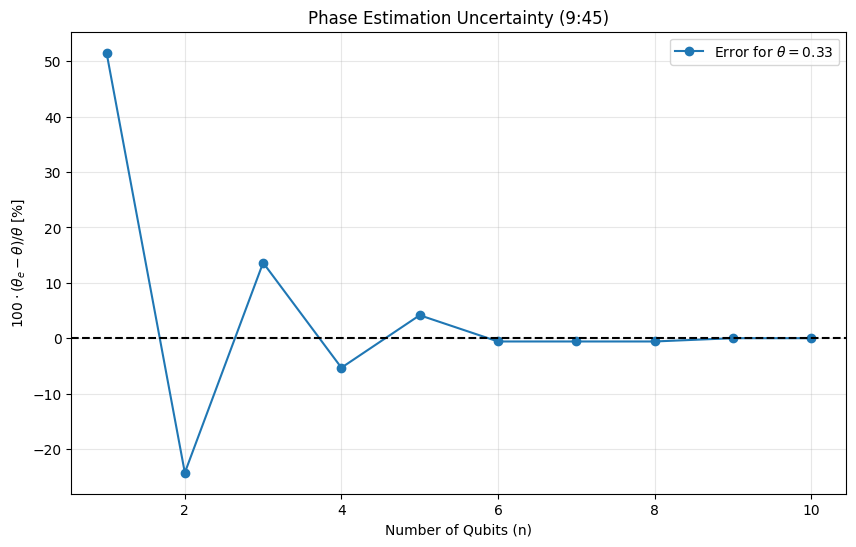

In [34]:
print(f"\n--- Results for 9:45 (Theta = {THETA}) ---")

n_values, dec, theta_es, errors = run_phase_estimation(THETA, 10)

print(f"{'n (Qubits)':<10} | {'Decimal':<15} | {'Estimated θe':<15} | {'Error (%)':<10}")
print("-" * 40)
for n, d, te, err in zip(n_values, dec, theta_es, errors):
    print(f"{n:<10} | {d:<15} | {te:<15.6f} | {err:<10.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(n_values, errors, 'o-', label=f'Error for $\\theta={THETA}$')
plt.axhline(y=0, color='k', linestyle='--')
plt.title(f'Phase Estimation Uncertainty (9:45)')
plt.xlabel('Number of Qubits (n)')
plt.ylabel(r'$100 \cdot (\theta_e - \theta) / \theta$ [%]')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()